# Exploratory data analysis

In [1]:
# importing libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

In [2]:
data = pd.read_csv("Placement_Data_Full_Class.csv")

data.drop("sl_no", axis=1, inplace=True) # Removing Serial Number

In [3]:
print("Number of rows in data :",data.shape[0])
print("Number of columns in data :", data.shape[1])

Number of rows in data : 215
Number of columns in data : 14


In [4]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**We have 7 columns with real values and 8 with object datatype**

**It is clear that only salary has null columns. Let's see how much?**

In [6]:
# Percentage of null values present in salary column

p = data['salary'].isnull().sum()/(len(data))*100

print(f"Salary column has {p.round(2)}% null values.")

Salary column has 31.16% null values.


**This means that around 31% candidates were not placed which is sad but let's see what were the reasons :)**

In [7]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
# Let's peek at the object data types seperately

data.select_dtypes(include=['object']).head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


<b>We have a total of 8 columns with non-integer or float data. Let's now look at the amount of classes (unique values) these columns.<b>

In [9]:
# getting the object columns
object_columns = data.select_dtypes(include=['object']).columns

# iterating over each object type column
for col in object_columns:
    print('-' * 40 + col + '-' * 40 , end='-')
    display(data[col].value_counts())

----------------------------------------gender-----------------------------------------

M    139
F     76
Name: gender, dtype: int64

----------------------------------------ssc_b-----------------------------------------

Central    116
Others      99
Name: ssc_b, dtype: int64

----------------------------------------hsc_b-----------------------------------------

Others     131
Central     84
Name: hsc_b, dtype: int64

----------------------------------------hsc_s-----------------------------------------

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

----------------------------------------degree_t-----------------------------------------

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

----------------------------------------workex-----------------------------------------

No     141
Yes     74
Name: workex, dtype: int64

----------------------------------------specialisation-----------------------------------------

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

----------------------------------------status-----------------------------------------

Placed        148
Not Placed     67
Name: status, dtype: int64

<h3>OBSERVATION:</h3>

Looks like except for hsc_s and degree_t with 3 classes, all other have 2 classes each and also we can see that this data is slightly imbalanced as we have 148 placed students and 67 not placed students.

## Exploring the columns

### Gender (Male, Female)

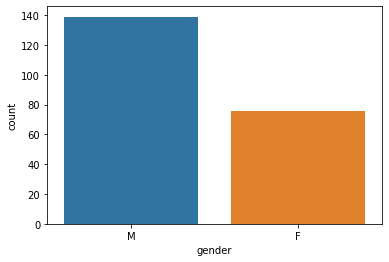

In [10]:
sns.countplot("gender", data = data)
plt.show()

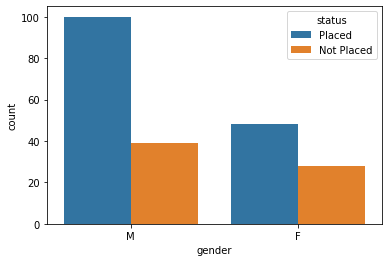

In [11]:
# Let's look at more important plot i.e gender vs status (target)

sns.countplot("gender", hue="status", data=data)
plt.show()

<h3>OBSERVATIONS:</h3>

**(I)** The number of **male students are almost double as compared to female**.<br>
**(II)** As the fraction of placed vs not placed for female candidates is significantly low as compared to male candidates thus we can conclude **male candidates are accepted more often than female.**

### ssc_b (Board of Education - Secondary)

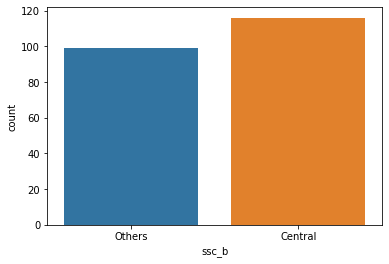

In [12]:
sns.countplot("ssc_b", data = data)
plt.show()

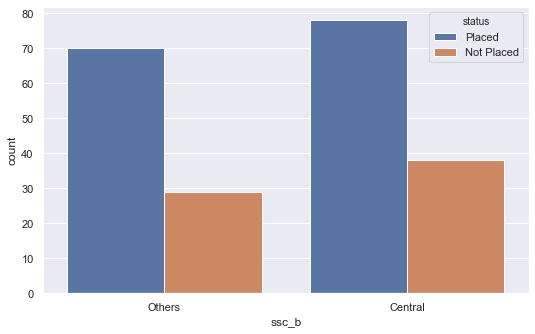

In [13]:
# Let's see the impact of taking a spcific board in 10th grade on placements

sns.set(rc={'figure.figsize':(8.7,5.27)})

sns.countplot("ssc_b", hue="status", data=data)
plt.show()

<h3>OBSERVATIONS:</h3>

**(I)** There is **count of central board students is very high as compared to all other boards**.It might be because **central board is easy**.

**(II)** The count of placed students from central board is little more than others category which doesn't say much.


### ssc_p (Secondary Education - 10th grade)

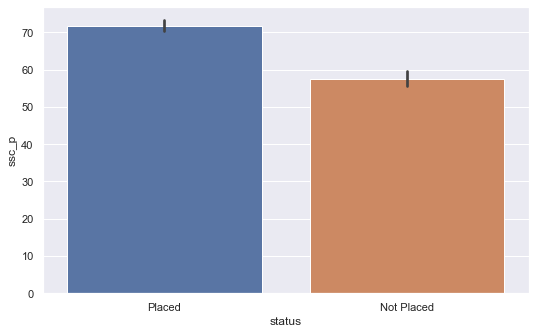

In [14]:
# Let's plot percentage vs status to see how much effect they make

sns.barplot(x="status", y="ssc_p", data=data)

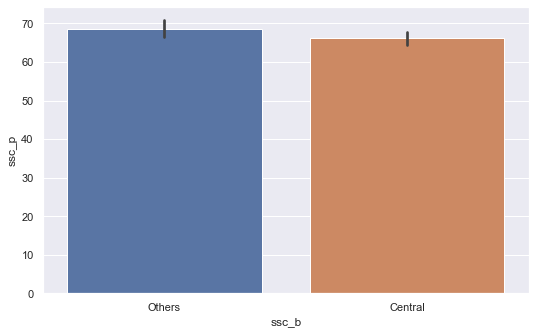

In [15]:
# Let's see the how much percentage was scored by students in different boards

sns.barplot(x="ssc_b", y="ssc_p", data=data)

<h3>OBSERVATIONS:</h3>


**(I)** Percentage in secondary education has a clear impact on placements.**Higher percentage candidates have a very good chance of getting placed**.

**(II)** Looks like there is not impace of boards on percentages of students.

### hsc_b (Board of Education - Higher)

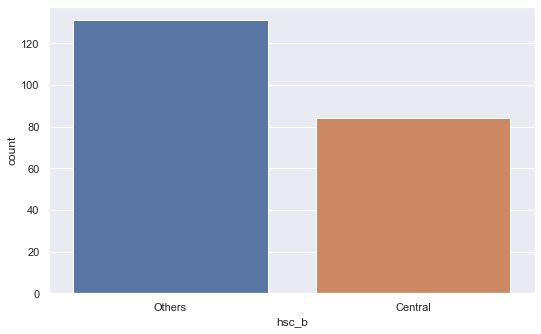

In [16]:
# Let's look at how many students opted for central this time?

sns.countplot("hsc_b", data = data)
plt.show()

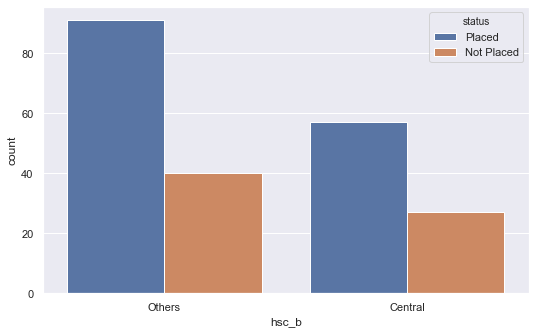

In [17]:
# Let's see the impact of a spcific board on placements

sns.set(rc={'figure.figsize':(8.7,5.27)})

sns.countplot("hsc_b", hue="status", data=data)
plt.show()

<h3>OBSERVATIONS:</h3>


**(I)** Looks like **more number of candidates opted for others for 12th grade as compared to 10th grade.**

**(II)** This time also not much difference between in the fraction of placed candidates in respective boards. Thus, **board doesn't matter in placements**.

### hsc_p (Percentage- 12th Grade)

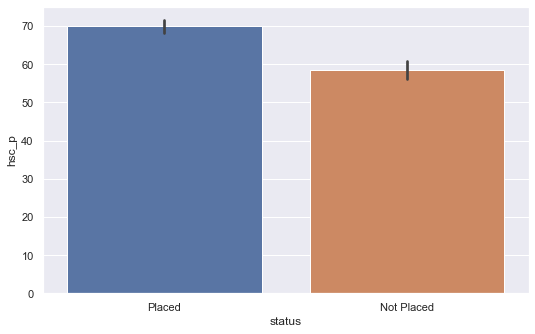

In [18]:
# Let's plot percentage vs status to see how much effect they make

sns.barplot(x="status", y="hsc_p", data=data)

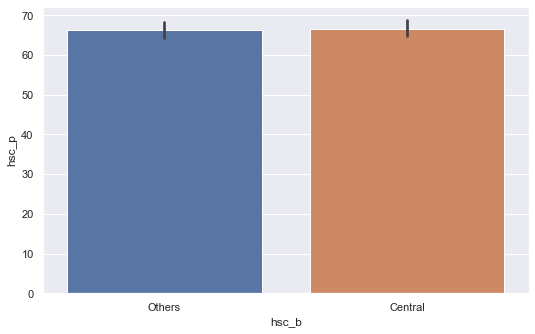

In [19]:
# Let's see the how much percentage was scored by students in 12th grade in different boards

sns.barplot(x="hsc_b", y="hsc_p", data=data)

<h3>OBSERVATIONS:</h3>


**(I)** Percentage in higher secondary education also has a clear impact on placements. **Higher percentage candidates have a very good chance of getting placed**.<br>

**(II) Board isn't a determinant in defining how much precentage students score.**<br>

Thus, it turns out that a piece of paper can definately decide your future atleast for placements, so study hard!

### hsc_s (Specialization in Higher Secondary Education) 

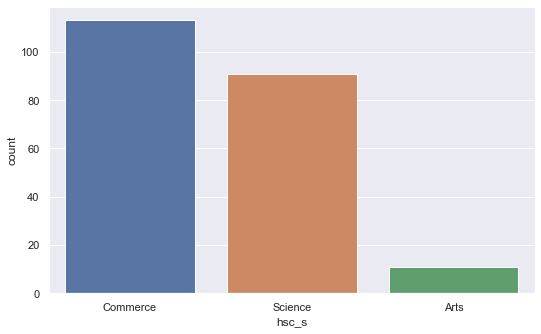

In [20]:
# Let's see what count of students opted for in 12th grade

sns.countplot("hsc_s", data=data)

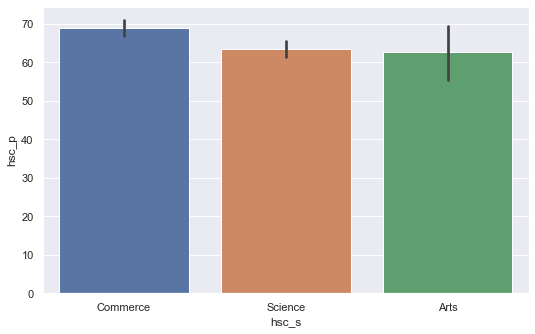

In [21]:
# Let's look at how well each specialisation students performed

ax = sns.barplot(x="hsc_s", y="hsc_p", data=data)

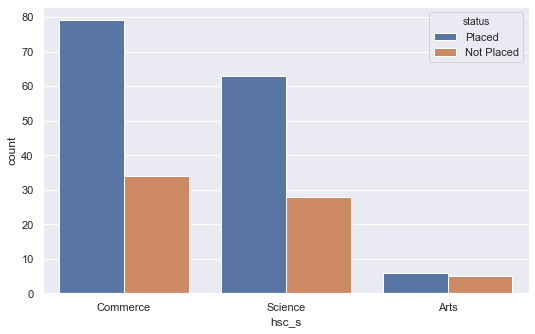

In [22]:
# Let's see the impact of taking a spcific branch on placements

sns.countplot("hsc_s", hue="status", data=data)

<h3>OBSERVATIONS:</h3>

    
**(I)** The **most popular branch turns out to be commerce** or maybe as most of students get average marks so they were admitted to got commerce on based of their marks. **Science is the second most popular and the least popular is arts.**

**(II)** **Almost every branch students performed equally but commerce students have slightly better score than other two.**

**(III)** Looking at the fraction of placed and not placed we can say that **science branch students have more chance of getting placed than commerce students and most around 45% of the students in arts are not placed**

### degree_t & degree_p (Degree Type and Degree percentage)

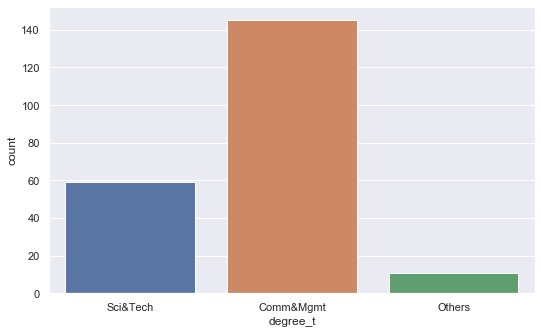

In [23]:
# Let's see what count of students opted for what after 12th grade

sns.countplot("degree_t", data=data)

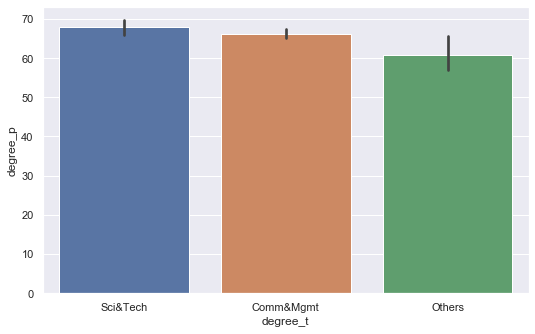

In [24]:
# Let's look at how well each field students performed

sns.barplot(x="degree_t", y="degree_p", data=data)

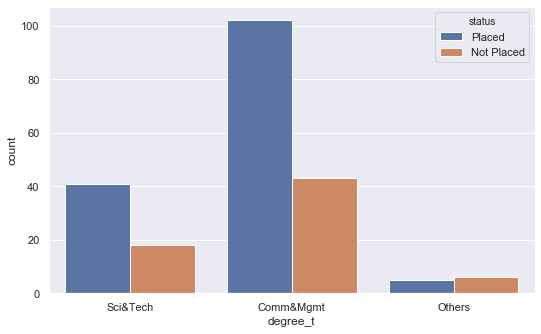

In [25]:
# Let's see the impact of taking a field on placements

sns.countplot("degree_t", hue="status", data=data)

<h3>OBSERVATION:</h3>


**(I)** The students opted for following fields:

<ol>
<li>Science and Technology (must be science students)</li>
<li>Commerce and management (might be a mixture of commerce and Arts)</li>
<li>Others</li>
</ol>

**(II)** There is **not much difference in performace of students from Science and Commerce** but there but **students who opted for "Others" have low performance**

**(III)** Looks like **Commerce and Science degree students are preffered by companies** which is obvious. **Students who opted for Others have very low placement chance.**

### workex (Work Experience)

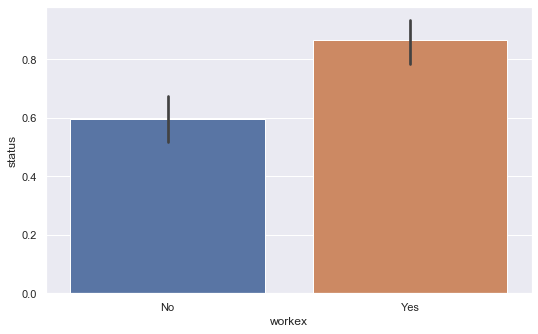

In [26]:
# Let's see if the work experience impacts on placements or not

data['status'] = data['status'].map( {'Placed':1, 'Not Placed':0})

sns.barplot(x="workex", y="status", data=data)

<h3>OBSERVATION:</h3>

Companies prefer candidates with work experience so the **students with internships and past job experience have better chances of being placed.**

### etest_p (Employability test percentage)

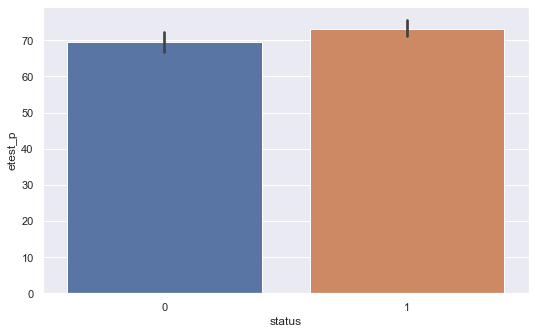

In [27]:
sns.barplot(x="status", y="etest_p", data=data)

<h3>OBSERVATION:</h3>

We can see that getting good percentages in **employability test does not guarantee placement** of the candidate.

### specialisation (Post Grad - MBA)

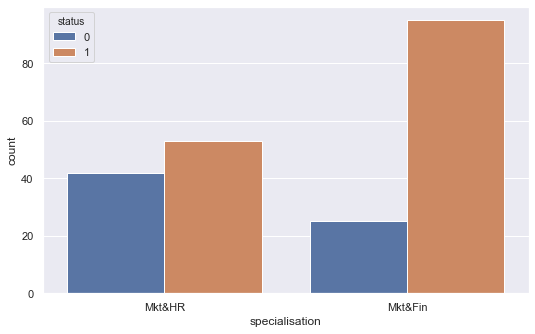

In [28]:
# Let's see how specialisation effects the placement of candidates

sns.countplot("specialisation", hue="status", data=data)

<h3>OBSERVATION:</h3>

Specialisation is a clear indicator in placements. Compared to MktandFin, **Mkt&HR students have low placements**. This might be because there is low requirements for HR in a company. 

### mba_p (MBA percentage)

Text(0.5, 1.0, 'Salary vs MBA Percentage')

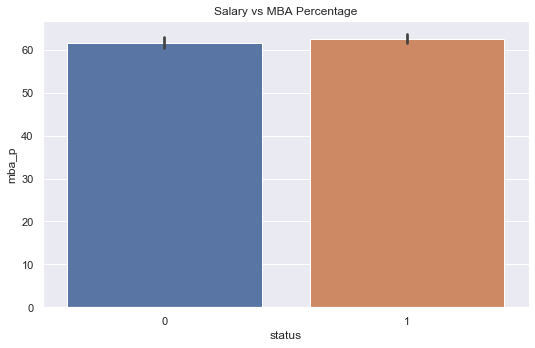

In [29]:
sns.barplot(x="status", y="mba_p", data=data)
plt.title("Salary vs MBA Percentage")

We can see that getting good percentages in **MBA does not guarantee placement** of the candidate.

### Salary 

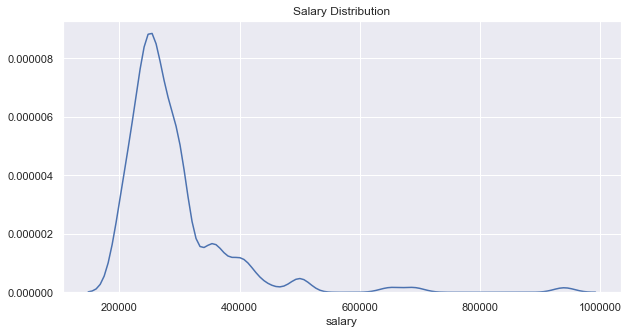

In [30]:
# Let's look at the distribution of salary

plt.figure(figsize=(10,5))
sns.distplot(data['salary'], bins=50, hist=False)
plt.title("Salary Distribution")
plt.show()

**Looking at the distribution we can say that the most of the students get a package between 200k-400k and most salaries above 400,000 are outliers.**

Text(0.5, 1.0, 'Salary vs gender')

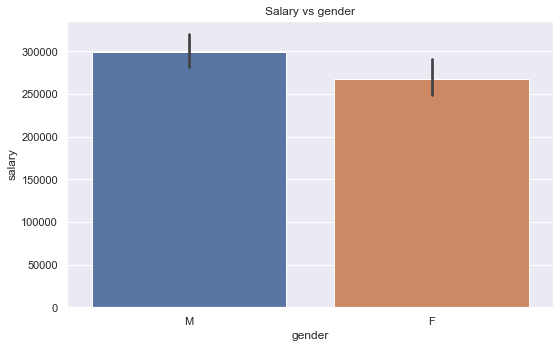

In [31]:
sns.barplot(x="gender", y="salary", data=data)
plt.title("Salary vs gender")

<h3>OBSERVATION:</h3>


**Male candidates are making more money as compared to female candidates.**

Text(0.5, 1.0, 'Salary vs Gender based on specialisation')

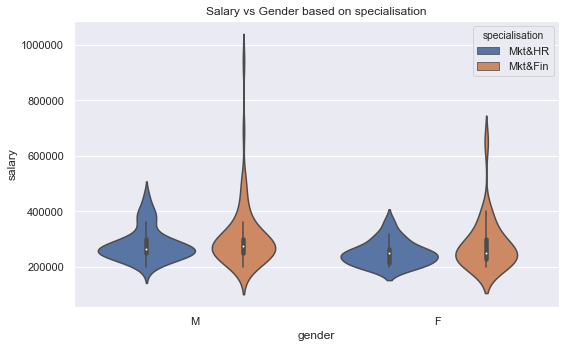

In [32]:
sns.violinplot(x=data["gender"], y=data["salary"], hue=data["specialisation"])
plt.title("Salary vs Gender based on specialisation")

<h3>OBSERVATIONS:</h3>

**(I)** Salary column for male candidates seems to have more outliers than females which means that a lot **more male candidates got more than the average CTC.**

**(II) Mean salary is somewhere around 220k**.

**(III) Mkt&Fin students are given higher salaries as compared to Mkt&HR.**

Text(0.5, 1.0, 'Gender vs Salary based on work experience')

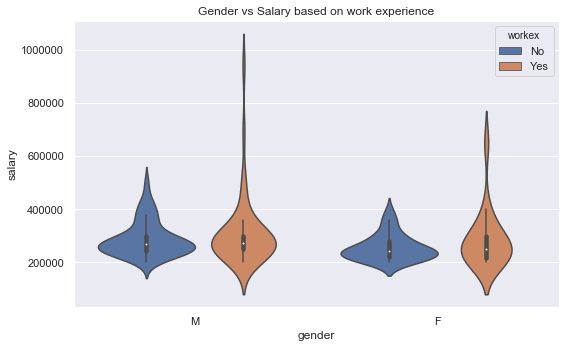

In [33]:
sns.violinplot(x=data["gender"], y=data["salary"], hue=data["workex"])
plt.title("Gender vs Salary based on work experience")

<h3>OBSERVATIONS:</h3>

**(I)** Work Experience is a clear indicator as **more work experience results in higher CTC jobs.**

**(II) The maximum salary in male candidates with experience is >1M and for female it is ~700k.
The maximum salary in male candidates without experience is ~550k and for female it is ~430k.**

Text(0.5, 1.0, 'Salary vs Gender based on Board in 10th grade')

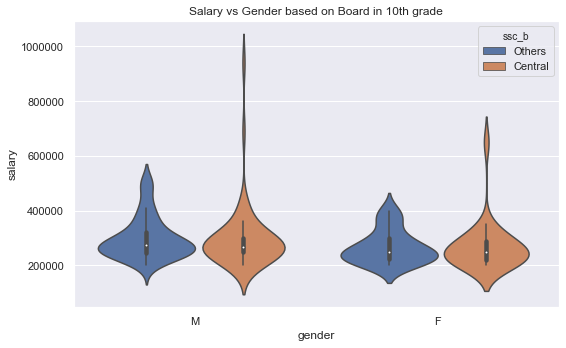

In [34]:
sns.violinplot(x=data["gender"], y=data["salary"], hue=data["ssc_b"])
plt.title("Salary vs Gender based on Board in 10th grade")

<h3>OBSERVATION:</h3>


Both Male and Female candidates from Central board got higher CTC as compared to other boards thus we can that central board in 10th grade might fetch you higher CTCs.

Text(0.5, 1.0, 'Salary vs Gender based on Board in 12th grade')

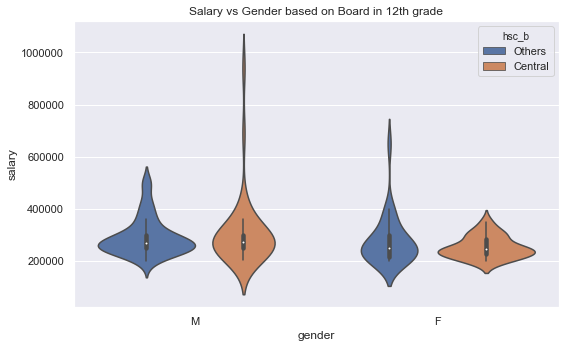

In [35]:
sns.violinplot(x=data["gender"], y=data["salary"], hue=data["hsc_b"])
plt.title("Salary vs Gender based on Board in 12th grade")

<h3>OBSERVATION:</h3>

Male candidates from Central board got higher CTC as compared to other boards whereas this was totally opposite in case of female candidates thus there is not much guarantee that either of the board will fetch higher CTCs.

Text(0.5, 1.0, 'Salary vs Gender based on Degree Type')

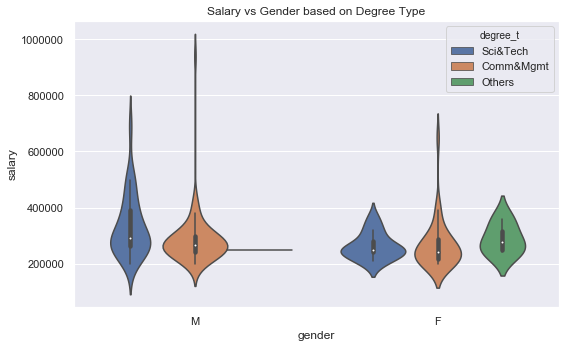

In [36]:
sns.violinplot(x=data["gender"], y=data["salary"], hue=data["degree_t"])
plt.title("Salary vs Gender based on Degree Type")

<h3>OBSERVATIONS:</h3>

**(I)** Both male and female candidate got high CTCs choosing Comm&Mgmt as their degree.

**(II)** Male candidates from Sci&Tech got high CTCs as compared to Female candidates.

**(III)** None of the male candidates got placed from "Others" category whereas for female candidates the package is close to what female Sci&Tech candidates got.

# Conclusions Drawn

<ol>
<li>More male candidates got placed as compared to female candidates.</li>
<li>Male Candidates got higher CTCs as compared to female candidates.</li>
<li>Type of Board choosen does not have any effect on placements thus we can drop in preprocessing steps.</li>
<li>Most of the students preferred Central board in 10th grade whereas other boards in 12th grade.</li>
<li>Candidates with higher percentages have better chance of placements.</li>
<li>Choosing Science and Commerce as Specialisation seems to have perk when it comes to placments.</li>
<li>Maximum package was bagged by male candidate from Mkt&Fin branch which is around 940k.</li>
<li>Commerce is the most popular branch among candidates.</li>
<li>Mean CTC is around 220k for male and female candidates individually.</li>
<li>Choosing Sci&Tech and Comm&Mngmt as degree will fetch you higher CTCs.</li>
<li>Mkt&Fin major have higher salaries and more placement chance as compared to Mkt&HR.</li>
<li>Employability test percentage and MBA percentage does not effect the placements</li>

# Preprocessing

**The data doesn't have any missing values except for salary (not useful - we will see why) so there is not much data cleaning but we will have to do encoding of categorical variables, note that - target(status) is already been encoded during EDA.**

**Before that, we will drop both secondary and higher secondary boards as discussed in conclusions of EDA.**

**We will also remove salary column as it is clearly depends on whether the candidate got placed or not so it is not at all useful and can fool us by giving 100%. (BIG MISTAKE!)**

In [37]:
# Dropping useless columns

data.drop(['ssc_b','hsc_b', 'salary'], axis=1, inplace=True)

### Encoding

We have **gender, hsc_s, degree_t, workex and specialisation** as categorical so let's encode them.

In [38]:
# Using simple binary mapping on two class categorical variables (gender, workerx, specialisation)

data["gender"] = data.gender.map({"M":0,"F":1})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [39]:
# Using get dummies for 3 class categorical variables (hsc_s and degree_t)

for column in ['hsc_s', 'degree_t']:
    dummies = pd.get_dummies(data[column])
    data[dummies.columns] = dummies

In [40]:
# Now let's clean up the left overs (already encoded so no use now)

data.drop(['degree_t','hsc_s'], axis=1, inplace=True)

In [41]:
# Now let us look at the data

data.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1,0,1,0,1,0,0


**Our data is now completely encoded. GOOD JOB!**

In [42]:
# Let's do a sanity check by peeking at the data

data.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1,0,1,0,1,0,0


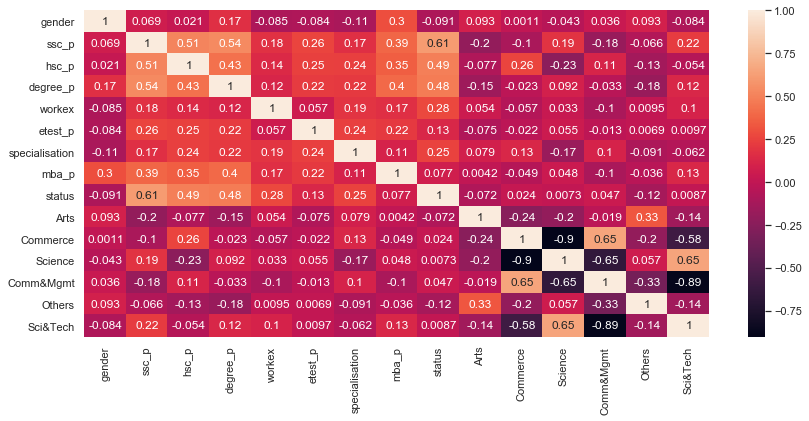

In [43]:
# Let's plot correlation matrix to find out less correlated variable to drop them

cor=data.corr()
plt.figure(figsize=(14,6))
sns.heatmap(cor,annot=True)

In [44]:
# From the correlation matrix we can see that some of the features are not much useful like "Others" and "Arts" which are negatively 
# correlated as well as have low value.

# Another reason to remove these variables is the so called Dummy variable trap which occurs when we do encoding of multiclass features

data.drop(['Others', 'Arts'], axis=1, inplace=True)

### Splitting the data 

In [45]:
# target vector
y = data['status']

# dropping as it is not a predictor
data.drop('status', axis = 1, inplace = True)

# scaling the data so as to get rid of any dramatic results during modelling
sc = StandardScaler()

# predictors
X = sc.fit_transform(data)

# Let us now split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


print("X-Train:",X_train.shape)
print("X-Test:",X_test.shape)
print("Y-Train:",y_train.shape)
print("Y-Test:",y_test.shape)

X-Train: (150, 12)
X-Test: (65, 12)
Y-Train: (150,)
Y-Test: (65,)


# Model Prediction

**Problem:** Predict whether the candidate will be placed or not based on some predictors.

**Nature of Problem:** As the target is a binary data thus it is a **binary classification problem.**

### Logistic Regression

**Let's apply logistic regression as it is a classification algorithm that works well with binary data.**

In [46]:
# creating our model instance
log_reg = LogisticRegression()

# fitting the model
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# predicting the target vectors

y_pred=log_reg.predict(X_test)

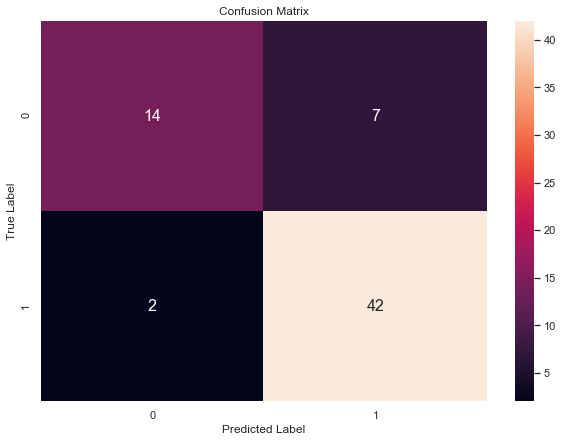

In [48]:
# creating confusion matrix heatmap

conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
fig = plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Some Insights:

Our confusion Matrix looks decent. We have correctly predicted 42 (placed) + 14 (not-placed) correct predictions and 7 (not placed as placed) + 2(placed as not-placed) incorrect predictions.

We need to decrease these incorrect predictions because a good candidate can be rejected (false positive) [Type I error] and a unfit candidate can be selected (false negatives) [Type II Error]. 

In [49]:
# getting precision, recall and f1-score via classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        21
           1       0.86      0.95      0.90        44

    accuracy                           0.86        65
   macro avg       0.87      0.81      0.83        65
weighted avg       0.86      0.86      0.86        65



**Looking at the precision, recall and f1_score we can saw that our Logistic Regression model did fairly well!**

In [50]:
# let's look at our accuracy

accuracy = accuracy_score(y_pred, y_test)

print(f"The accuracy on test set using Logistic Regression is: {np.round(accuracy, 3)*100.0}%")

The accuracy on test set using Logistic Regression is: 86.2%


**We achieved 86% without doing any tuning so it means we did preprocessing steps really well. Great!**

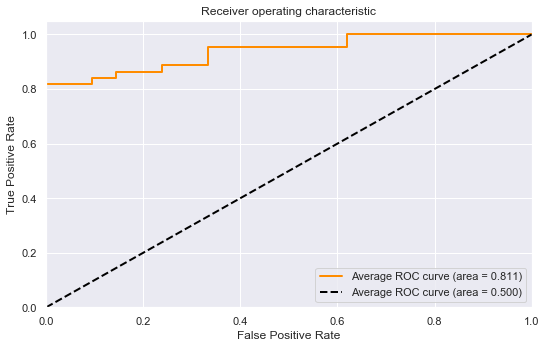

In [51]:
# plotting the ROC curve

auc_roc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='Average ROC curve (area = {0:0.3f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', 
         label= 'Average ROC curve (area = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [52]:
# calculate auc 
auc_score = auc(fpr, tpr)
print(f"Our auc_score came out to be {round(auc_score, 3)}.")

Our auc_score came out to be 0.938.


###  Decision Tree Classifier

**Let's try some decision trees now and see how well they perform but as Decision trees are easy to overfit so I will use K-FOLD CV first to find the best depth.**

In [53]:
# creating a list of depths for performing Decision Tree
depth = list(range(1,10))

# list to hold the cv scores
cv_scores = []

# perform 10-fold cross validation with default weights
for d in depth:
  dt = DecisionTreeClassifier(criterion="gini", max_depth=d, random_state=42)
  scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
  cv_scores.append(scores.mean())

# finding the optimal depth
optimal_depth = depth[cv_scores.index(max(cv_scores))]
print("The optimal depth value is: ", optimal_depth)

The optimal depth value is:  8


**Looks like max_depth = 8 is good for our model**

**Lets plot some graph to see what was the trend of our accuracies.**

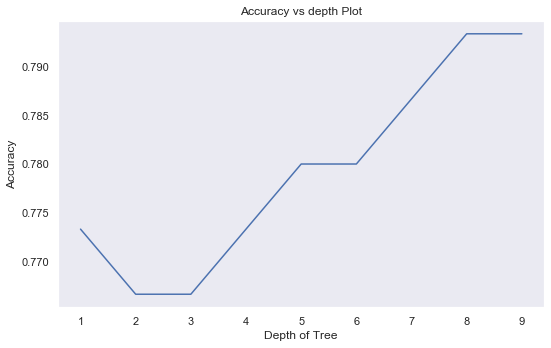

Accuracy scores for each depth value is :  [0.773 0.767 0.767 0.773 0.78  0.78  0.787 0.793 0.793]


In [54]:
# plotting accuracy vs K
plt.plot(depth, cv_scores)
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs depth Plot")
plt.grid()
plt.show()

print("Accuracy scores for each depth value is : ", np.round(cv_scores, 3))

**This doesn't look awesome but isn't bad either so let's trust our CV and use the optimal max_depth = 8 to train our model.**

In [55]:
# create object of classifier
dt_optimal = DecisionTreeClassifier(criterion="gini", max_depth=optimal_depth, random_state=42)

# fit the model
dt_optimal.fit(X_train,y_train)

# predict on test vector
y_pred = dt_optimal.predict(X_test)

# evaluate accuracy score
accuracy = accuracy_score(y_test, y_pred)*100
print(f"The accuracy on test set using optimal depth = {optimal_depth} is {np.round(accuracy, 3)}%")

The accuracy on test set using optimal depth = 8 is 86.154%


**We achieved 86% accuracy which is similiar to what we achieved using logistic regression so they seem to work equally well.**

**What if we could combine the power of our two heroes to get a superhero? Sounds weird? It is!**

### Ensemble Modelling

**We will train a voting classifier using our previously trained logistic regeression and Decision tree model**

In [56]:
# creating a list of our models
ensembles = [log_reg, dt_optimal]

# Train each of the model
for estimator in ensembles:
    print("Training the", estimator)
    estimator.fit(X_train,y_train)

Training the LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Training the DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [57]:
# Find the scores of each estimator

scores = [estimator.score(X_test, y_test) for estimator in ensembles]

scores

[0.8615384615384616, 0.8615384615384616]

**We didn't do anything awesome yet. We just made a list of both of our previously trained classifiers. Let's add some awesomeness!**

In [58]:
# Training a voting classifier with hard voting and using logistic regression and decision trees as estimators

from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("log_reg",log_reg),
    ("dt_tree", dt_optimal),

]

In [59]:
# getting an instance for our Voting classifier

voting_clf = VotingClassifier(named_estimators)

In [60]:
# fit the classifier

voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt_tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                 

In [61]:
# Let's look at our accuracy
acc = voting_clf.score(X_test,y_test)

print(f"The accuracy on test set using voting classifier is {np.round(acc, 4)*100}%")

The accuracy on test set using voting classifier is 92.31%


**We went from 86.4% to 92.3% accuracy score!**

**If that isn't amazing I don't know what is.**

## Thanks for reading!